In [28]:
import pandas as pd
import numpy as np
from modified_spectral_method import *
from modified_louvain_method import *
from proxy_methods import * 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
correlation_matrix,T,N,company_names = create_correlation_matrix('eur_data_standardized_returns.csv')  
C_g = calculate_C_g(correlation_matrix,T,N) #Modularity matrix

In [3]:
# louvain_communities = modified_louvain(C_g)
# louvain_company_communities = map_communities_to_company_names(louvain_communities,company_names)

result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names,min_size=2, modularity_threshold=0.00001)

In [19]:
returns_data = pd.read_csv('eur_data_log_returns.csv')
returns_data = returns_data.set_index('Date')
meta_data = pd.read_csv('metadata.csv')
meta_data = meta_data.set_index('Ticker')
sovereign_bond_tickers = meta_data[meta_data['Sector'] == 'Government'].index.tolist()
sovereign_bond_returns_data = returns_data[sovereign_bond_tickers]

sovereign_bond_returns_data


,AUST,BELG,CYPRUS,DBR,DENK,ESS,FINL,FRTR,ICELND,IRELND,ITALY,LAZIO,NETHRS,NORWAY,PORTUG,SICILY,SPAIN,SWED,SWISS,UKIN
Date,,,,,,,,,,,,,,,,,,,,
2010-09-15,0.016872,0.047756,0.000042,0.042093,0.022884,-0.006856,0.083905,0.036368,-0.003454,0.024126,0.001940,0.031692,0.083810,-0.054494,0.003365,0.015698,-0.014005,0.014599,0.199913,0.020051
2010-09-16,0.006330,0.050821,0.000317,-0.025798,-0.036871,-0.002374,-0.029923,-0.042218,-0.004477,0.012983,-0.023295,0.002235,0.063081,0.007380,0.010738,0.004365,-0.004949,-0.024451,-0.168758,0.009877
2010-09-17,-0.004468,-0.056599,0.001385,0.003793,0.013986,-0.000820,0.013378,0.169862,-0.001254,0.066639,-0.002984,-0.026221,0.035344,0.021819,0.073479,-0.012257,0.036224,0.004938,-0.018576,-0.004926
2010-09-20,-0.053125,0.038186,-0.000410,-0.034402,0.009217,-0.000271,-0.019095,0.106797,-0.000565,0.069623,-0.003865,0.004535,-0.127599,0.007168,0.008692,-0.058670,-0.001890,0.014670,0.177926,0.024391
2010-09-21,0.026141,-0.005945,0.000744,0.081940,-0.032637,0.008657,-0.053644,-0.206718,0.024722,-0.020919,0.010798,0.004921,-0.050812,-0.043803,0.016393,0.010638,-0.022052,-0.019608,-0.177926,-0.014563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,-0.034403,-0.035469,-0.001929,-0.037737,-0.017055,-0.006609,0.018267,-0.035055,0.002107,-0.023650,-0.048413,-0.030564,0.024373,-0.014366,-0.026487,-0.053313,-0.030869,-0.015970,-0.039769,-0.044327
2020-04-29,-0.005259,-0.006737,0.003202,-0.009421,0.000000,0.002439,-0.047256,-0.021099,-0.001978,-0.012285,-0.006918,0.006342,-0.032773,-0.019112,-0.008102,-0.009509,0.001120,0.000000,0.000052,0.018086
2020-04-30,-0.013866,-0.008217,-0.003213,-0.002704,0.000000,-0.002464,-0.000245,-0.023158,-0.000783,0.003256,0.000810,-0.029908,0.000119,0.019112,-0.030608,0.000200,-0.029240,-0.016230,0.000537,-0.009843


In [20]:
community_returns_average_df = pd.DataFrame()

for community_number,community in enumerate(company_communities):

    community_returns = prices_data[community]
    community_returns_average = community_returns.mean(axis=1)
    community_returns_average_df[f"Community {community_number + 1}"] = community_returns_average


community_returns_average_df

,Community 1,Community 2,Community 3
Date,,,
2010-09-15,0.013052,0.007300,0.004545
2010-09-16,-0.005645,-0.009831,0.000546
2010-09-17,-0.000017,-0.007869,-0.001524
2010-09-20,0.023052,0.003669,0.002373
2010-09-21,-0.007649,-0.019731,-0.001270
...,...,...,...
2020-04-28,-0.028556,-0.006785,-0.009186
2020-04-29,-0.009492,-0.001260,-0.001900
2020-04-30,-0.012537,-0.018167,-0.005807


In [21]:
community_returns_average_df.to_csv('community_returns_average.csv')

# Correlation Matrix
---

In [23]:
# for column in sovereign_bond_price_data.columns:
#     time_series_list = sovereign_bond_price_data[column].tolist()
#     np_time_series = np.array(time_series_list)

merged_df = pd.merge(community_returns_average_df,sovereign_bond_returns_data,how='inner',left_index=True,right_index=True)
print(merged_df)

#Calculate correlation matrix
correlation_matrix2 = merged_df.corr()
    

            Community 1  Community 2  Community 3      AUST      BELG  \
Date                                                                    
2010-09-15     0.013052     0.007300     0.004545  0.016872  0.047756   
2010-09-16    -0.005645    -0.009831     0.000546  0.006330  0.050821   
2010-09-17    -0.000017    -0.007869    -0.001524 -0.004468 -0.056599   
2010-09-20     0.023052     0.003669     0.002373 -0.053125  0.038186   
2010-09-21    -0.007649    -0.019731    -0.001270  0.026141 -0.005945   
...                 ...          ...          ...       ...       ...   
2020-04-28    -0.028556    -0.006785    -0.009186 -0.034403 -0.035469   
2020-04-29    -0.009492    -0.001260    -0.001900 -0.005259 -0.006737   
2020-04-30    -0.012537    -0.018167    -0.005807 -0.013866 -0.008217   
2020-05-01     0.024110     0.015664     0.005099 -0.023232 -0.004523   
2020-05-04     0.027336     0.027324     0.006712  0.016375  0.016004   

              CYPRUS       DBR      DENK       ESS

In [24]:
correlation_matrix2

#Remove first 3 columns
correlation_matrix2 = correlation_matrix2.iloc[:,3:]

#Only keep the first 3 rows
correlation_matrix2 = correlation_matrix2.iloc[:3,:]

In [25]:
correlation_matrix2

,AUST,BELG,CYPRUS,DBR,DENK,ESS,FINL,FRTR,ICELND,IRELND,ITALY,LAZIO,NETHRS,NORWAY,PORTUG,SICILY,SPAIN,SWED,SWISS,UKIN
Community 1,0.364483,0.485456,0.022561,0.346446,0.295605,0.042950,0.248385,0.369678,0.047538,0.513396,0.623511,0.263571,0.201208,0.276039,0.626888,0.215631,0.682069,0.294838,0.020729,0.505892
Community 2,0.333122,0.431842,0.020403,0.258941,0.255901,0.049459,0.192499,0.302646,0.081013,0.425608,0.461339,0.228906,0.160306,0.256066,0.525747,0.169524,0.557365,0.258694,0.051420,0.468489
Community 3,0.346534,0.427628,0.064741,0.248411,0.342993,0.169386,0.188283,0.322939,0.170557,0.364029,0.508848,0.398720,0.236838,0.325219,0.445300,0.355251,0.461309,0.323147,0.128174,0.396944


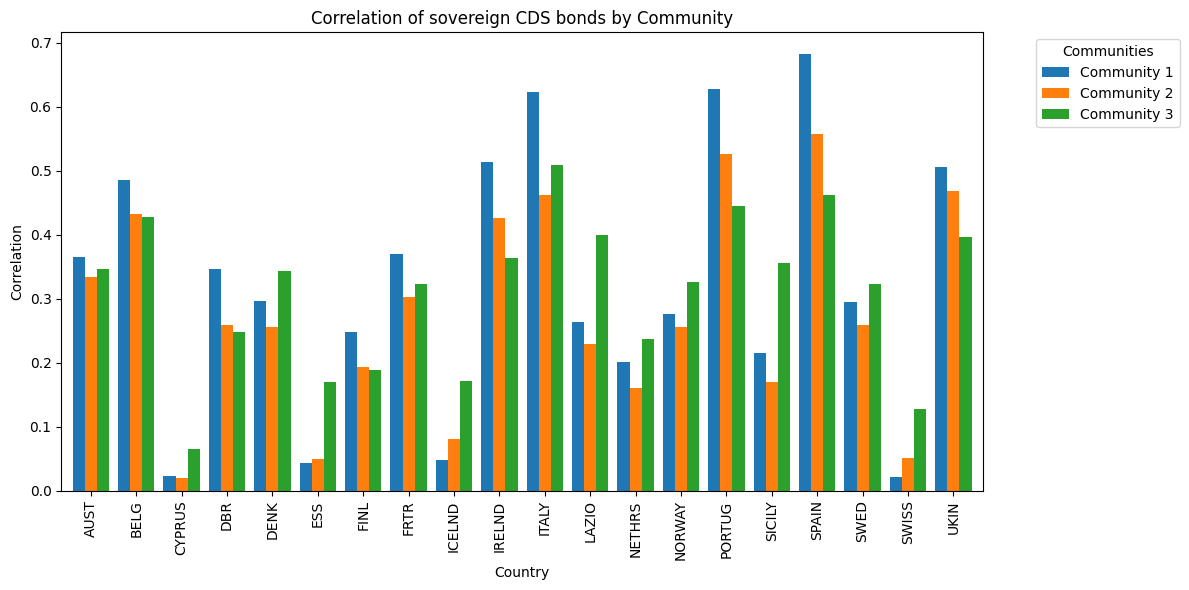

In [26]:
correlation_matrix2.T.plot(kind="bar", figsize=(12, 6), width=0.8)

# Add plot details
plt.title("Correlation of sovereign CDS bonds by Community")
plt.ylabel("Correlation")
plt.xlabel("Country")
plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


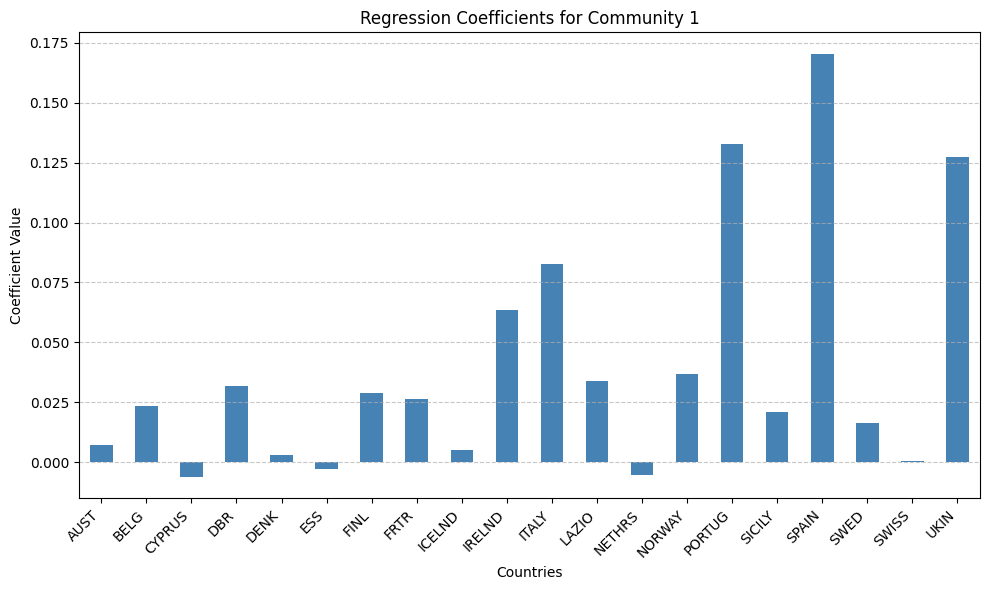

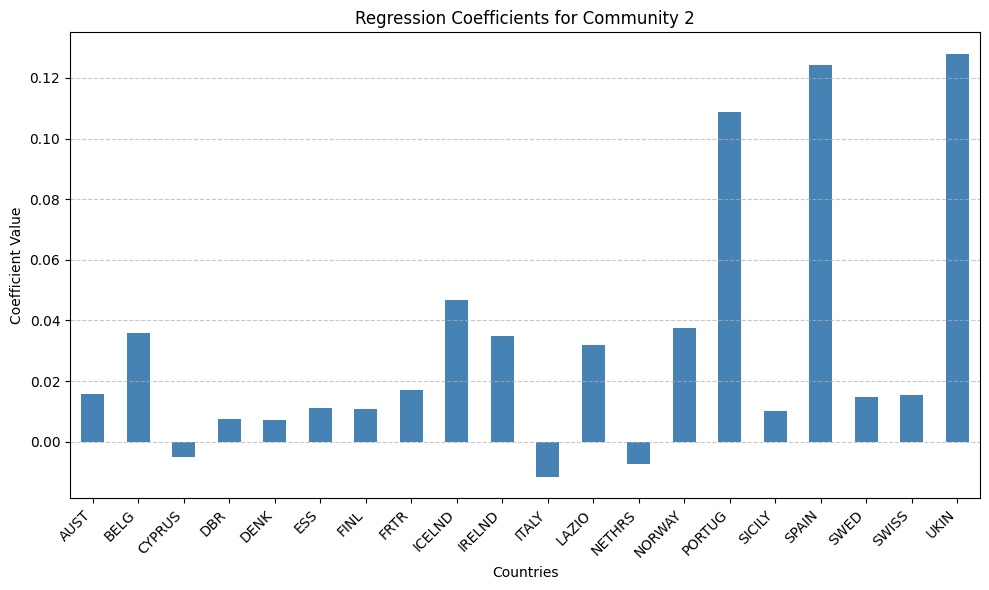

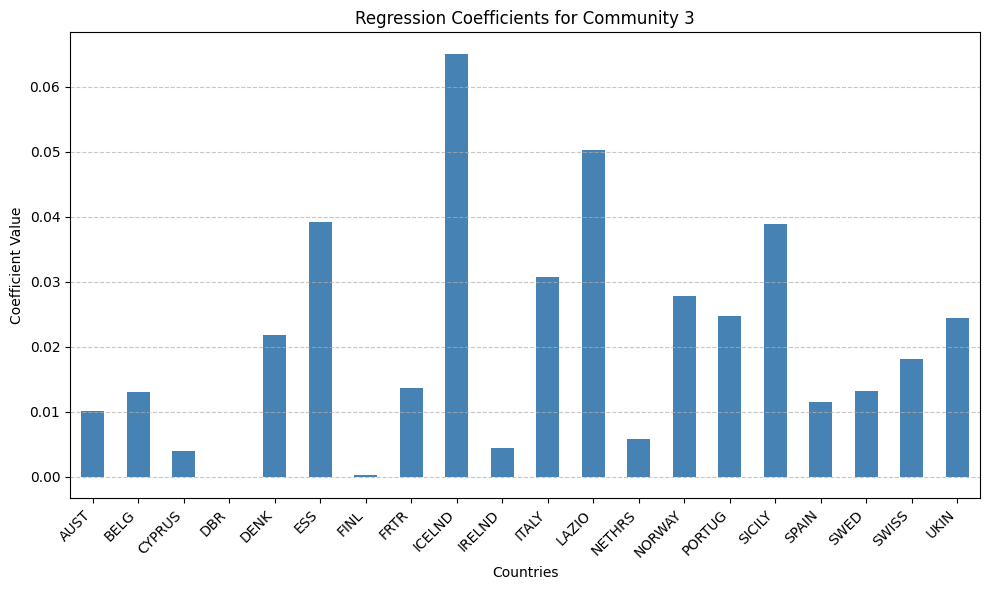

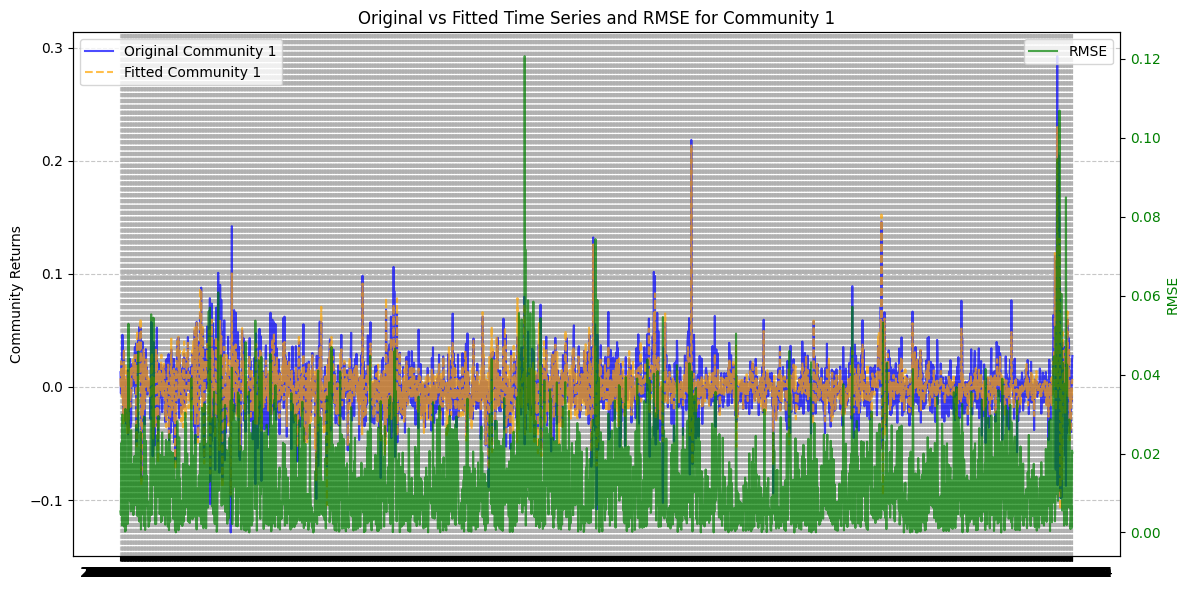

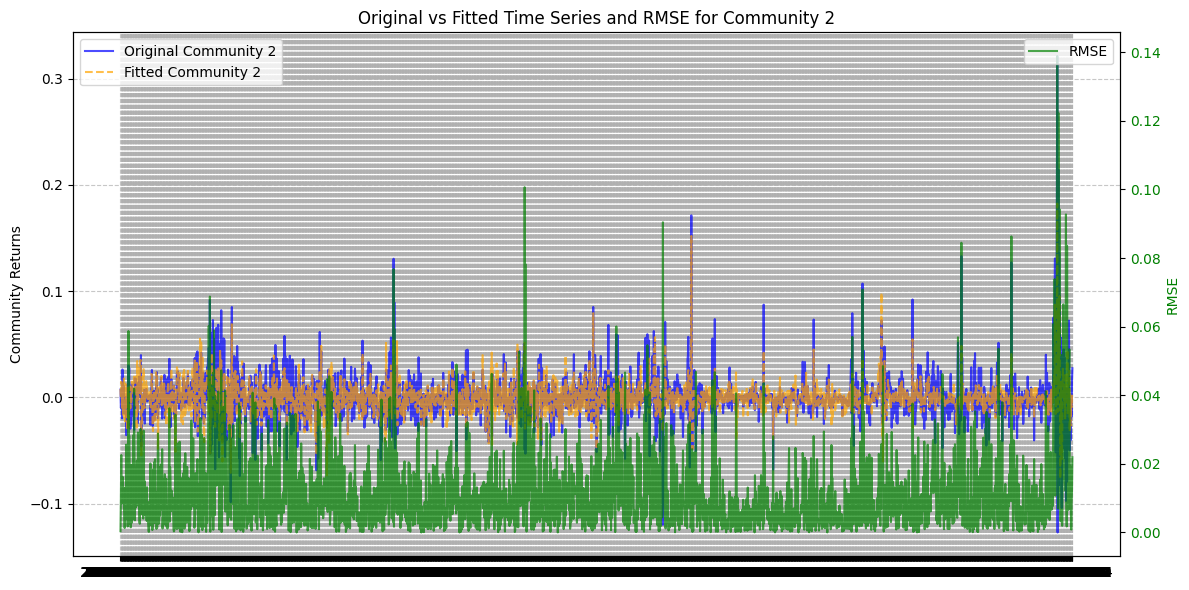

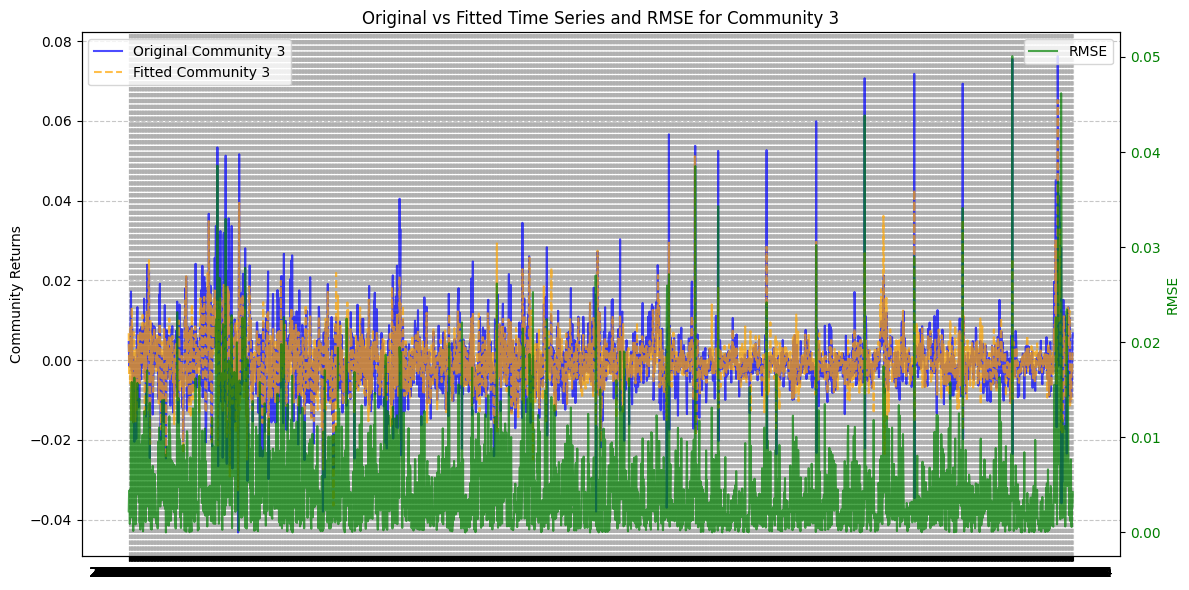

In [31]:
regression_results = {}
predicted_series = {}  # Store predicted series for each community
residuals = {}         # Store residuals for each community
errors = {}            # Store MSE for each time step for each community

# Fit regression for each community using all countries' data
for community in community_returns_average_df.columns:
    # Dependent variable (Community)
    y = community_returns_average_df[community].values

    # Independent variables (All countries)
    X = sovereign_bond_returns_data.values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Store regression coefficients
    regression_results[community] = model.coef_

    # Predict returns for the community
    y_pred = model.predict(X)

    # Store the predicted series for later plotting
    predicted_series[community] = y_pred

    # Compute residuals (Actual - Predicted)
    residuals[community] = y - y_pred

    # Compute Mean Squared Error (MSE) for each time step
    errors[community] = (residuals[community])**2

# Convert results to DataFrames for easier interpretation
predicted_series_df = pd.DataFrame(predicted_series, index=community_returns_average_df.index)
regression_coefficients_df = pd.DataFrame(regression_results, index=sovereign_bond_returns_data.columns)
residuals_df = pd.DataFrame(residuals, index=community_returns_average_df.index)
mse_df = pd.DataFrame(errors, index=community_returns_average_df.index)

# Plot regression coefficients as bar plots for each community
for community in regression_coefficients_df.columns:
    plt.figure(figsize=(10, 6))
    regression_coefficients_df[community].plot(kind='bar', color='steelblue')
    plt.title(f"Regression Coefficients for {community}")
    plt.xlabel("Countries")
    plt.ylabel("Coefficient Value")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot original vs fitted time series and RMSE on secondary axis
for community in community_returns_average_df.columns:
    plt.figure(figsize=(12, 6))

    # Original community time series
    plt.plot(community_returns_average_df.index, community_returns_average_df[community], 
             label=f"Original {community}", color='blue', alpha=0.7)

    # Fitted time series
    plt.plot(predicted_series_df.index, predicted_series_df[community], 
             label=f"Fitted {community}", color='orange', alpha=0.7, linestyle='--')

    # RMSE on secondary y-axis
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    rmse_series = mse_df[community].apply(np.sqrt)
    ax2.plot(mse_df.index, rmse_series, label="RMSE", color='green', linestyle='-', alpha=0.7)
    ax2.set_ylabel("RMSE", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Formatting the plot
    plt.title(f"Original vs Fitted Time Series and RMSE for {community}")
    plt.xlabel("Date")
    ax1.set_ylabel("Community Returns")
    ax1.grid(axis='both', linestyle='--', alpha=0.7)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

The sovereign bond CDS series are not able to capture the high volatility periods which can be observed by the high RMSE values.